#### 머신러닝 기초학습
---
##### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
 

##### 설명
- 다중회귀와 과적합이 발생할 때 적용할 규제에 대해서 살펴봅니다.
- 이 부분은 이해도 중요하지만 조금은 외웠을 때 이해가 될것 같습니다.
- 해당 내용이 이해가 잘 안되면 여러번 읽어보는것을 추천드립니다.
- 릿지 > 라쏘 > 엘라스틱넷 순서입니다.

In [86]:
# 지금까지는 특성이 하나만 존재하는(x의 변수가 하나뿐인) 데이터에 대해서 다루었습니다.
# 물론 마지막에 특성을 하나 추가했지만, 그런 형태의 방식을 다중회귀라고 합니다.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 하나의 독립변수(x)가 종속변수(y)에 영향을 미치는 것이 아니라 여러개의 독립변수가 종속변수에 영향을 미친다는 것이죠.
# 예를 들어 집값을 예측하는 프로그램을 구현할 때, 집값에 영향을 미치는게 단순하게 하나의 요소이진 않을테니까요.
# 기준금리, 대출금리, 자본 유동성 이런 다양한 요소들이 영향을 미칠테니 이 모든 변수들을 이용해 예측을 해야 정확한 모델이 나오는겁니다.

In [6]:
import pandas as pd
# 판다스는 csv데이터를 정말 잘 다룹니다.
df = pd.read_csv('https://bit.ly/perch_csv_data')
# 판다스 데이터프레임을 넘파이 형태로 변형시킨다는 의미입니다.
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [8]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                      perch_weight,
                                                                      random_state=42)

In [24]:
# 이전에는 데이터가 더 필요할 때, 일부러 직접 제곱을 해서 데이터에 넣었죠?
# preprocessing은 전처리를 담당하는 라이브러리인데 PolynomialFeatures를 통해서 기존의 데이터를 늘릴 수 있습니다.
from sklearn.preprocessing import PolynomialFeatures
# include_bias를 False로 설정하지 않으면 해당 배열에 1(편향)이 추가되어서 나옵니다.
pf = PolynomialFeatures(include_bias=False)
# 훈련과 변환을 동시에 사용할 수 있습니다.
train_poly = pf.fit_transform(train_input)
test_poly = pf.transform(test_input)

In [17]:
# 기존에 3개였던 데이터가 9개로 바뀌었네요!
print(train_poly.shape)

(42, 9)


In [19]:
# 해당 데이터를 어떻게 늘렸는지 나타내는데 x0^2는 1번째 값을 제곱했다는 의미입니다.
# x0 x1는 첫번째 값과 두번째 값을 곱했다는 의미입니다.
pf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [22]:
# 이 내용을 바탕으로 다중회귀모델을 훈련시켜보죠
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('다중회귀 훈련 점수 : {}'.format(lr.score(train_poly, train_target)))
print('다중회귀 테스트 점수 : {}'.format(lr.score(test_poly, test_target)))

다중회귀 훈련 점수 : 0.9903183436982126
다중회귀 테스트 점수 : 0.9714559911594125


In [23]:
# 이렇게 선형회귀 모델은 특성값이 많아지면 좋은 결과를 도출한다는 것을 알 수 있습니다.

In [25]:
# 그렇다면 특성의 개수를 더 늘려볼까요?
pf = PolynomialFeatures(degree=5, include_bias=False)
train_poly = pf.fit_transform(train_input)
test_poly = pf.transform(test_input)

In [27]:
# degree는 몇제곱까지 넣을 것인지를 결정하는 것입니다.
pf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [29]:
# 거의 완벽에 가깝게 학습을 했네요!
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999997232

In [30]:
lr.score(test_poly, test_target)

-144.40564483377855

In [34]:
# 테스트 셋에 대해서 음수의 값을 반환하는 군요. 왜 이런일이 발생하는 걸까요?
# 해당 모델은 훈련셋에 대해서 너무 과하게 학습되어서 과대적합이라고 말합니다.
# 이 과대적합을 해결하기 위해서 우리는 바로 규제라는 것을 사용합니다.
# 규제는 총 3가지가 있는데
#     - 여기서 설명하는 가중치란, 선형회귀에서 보았던 x1, x2.. 의 기울기입니다.
#     -  가중치가 크다는 의미는 해당 변수가 결과값에 강한 영향을 미친다는 이야기입니다.
#     1. L1 규제 : 라쏘 회귀 (Lasso Regression) : 상관성을 갖지 않는 가중치를 0으로 설정합니다.
#     2. L2 규제 : 릿지 회귀 (Ridge Regression) : 상관성을 갖니 않는 가중치를 0에 가깝게 설정합니다.
#     3. 엘라스틱넷 : 릿지 회귀 + 라쏘 회귀로 L1 규제와 L2 규제를 합친 것을 말합니다.

In [32]:
# 해당 모델을 구현하기 전에 전처리를 해볼까요?
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [36]:
print('Ridge train : {}'.format(ridge.score(train_scaled, train_target)))
print('Ridge test : {}'.format(ridge.score(test_scaled, test_target)))

Ridge train : 0.9896101671037343
Ridge test : 0.9790693977615387


In [37]:
# 테스트 점수가 정상적으로 돌아왔네요. 규제의 양을 임의로 조정할 수 있습니다.
# alpha의 값이 규제를 의미하는데 alpha의 값이 클수록 강하게 규제한다는 의미이죠.
import matplotlib.pyplot as plt

In [77]:
train_score = []
test_score = []

In [78]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

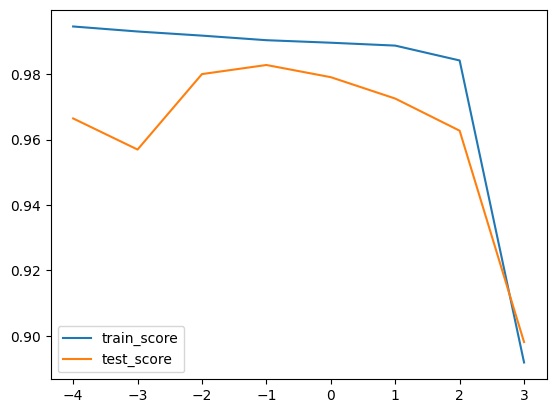

In [79]:
# alpha값 중에서 0.0001, 0.001 이렇게 생긴 친구들이 있기 때문에 각 값에 로그10을 취할게요.
# 간격이 매우 좁기 때문에 그래프가 잘 안보일테니깐요.
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.legend()
plt.show()

In [82]:
# 어느 값에서 훈련값과 테스트 값이 가장 높나요? 아마 -1, 0.1부분인 것 같군요!
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print('해당 모델에서 최적의 릿지 훈련 점수는 : {}'.format(ridge.score(train_scaled, train_target)))
print('해당 모델에서 최적의 릿지 테스트 점수는 : {}'.format(ridge.score(test_scaled, test_target)))

해당 모델에서 최적의 릿지 훈련 점수는 : 0.9903815817570367
해당 모델에서 최적의 릿지 테스트 점수는 : 0.9827976465386928


In [84]:
# 이번에는 라쏘 모델을 사용해볼까요?
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(train_scaled, train_target)
print('일단 한번 던져보는 라쏘 훈련 점수 : {}'.format(ls.score(train_scaled, train_target)))
print('일단 한번 던져보는 라쏘 테스트 점수 : {}'.format(ls.score(test_scaled, test_target)))

일단 한번 던져보는 라쏘 훈련 점수 : 0.989789897208096
일단 한번 던져보는 라쏘 테스트 점수 : 0.9800593698421883


In [90]:
# 라쏘 역시 규제를 굉장히 잘하는 편이군요.
# 라쏘도 각 규제 값에 따른 훈련, 테스트 점수를 볼까요?
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ls = Lasso(alpha=alpha)
    ls.fit(train_scaled, train_target)
    train_score.append(ls.score(train_scaled, train_target))
    test_score.append(ls.score(test_scaled, test_target))

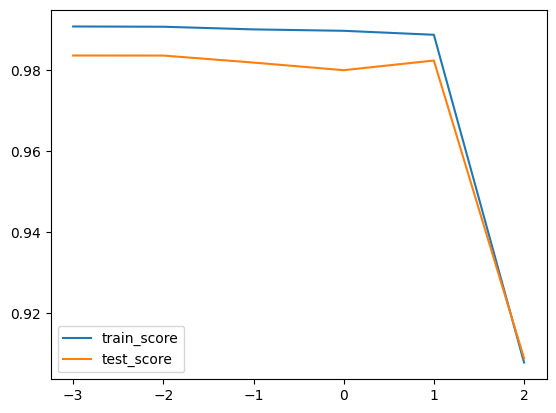

In [91]:
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.legend()
plt.show()

In [92]:
# Lasso의 값은 1일 때 가장 좋은 결과 값을 예측하는 군요.

In [95]:
# 마지막으로 엘라스틱넷도 살펴볼게요.
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(train_scaled, train_target)
print('해당 모델에서 최적의 엘라스틱넷 훈련 점수는 : {}'.format(en.score(train_scaled, train_target)))
print('해당 모델에서 최적의 엘라스틱넷 테스트 점수는 : {}'.format(en.score(test_scaled, test_target)))

해당 모델에서 최적의 엘라스틱넷 훈련 점수는 : 0.9878525957972832
해당 모델에서 최적의 엘라스틱넷 테스트 점수는 : 0.9687606937605281


In [97]:
# 엘라스틱도 각 규제 값에 따른 훈련, 테스트 점수를 볼까요?
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ls = ElasticNet(alpha=alpha)
    ls.fit(train_scaled, train_target)
    train_score.append(ls.score(train_scaled, train_target))
    test_score.append(ls.score(test_scaled, test_target))

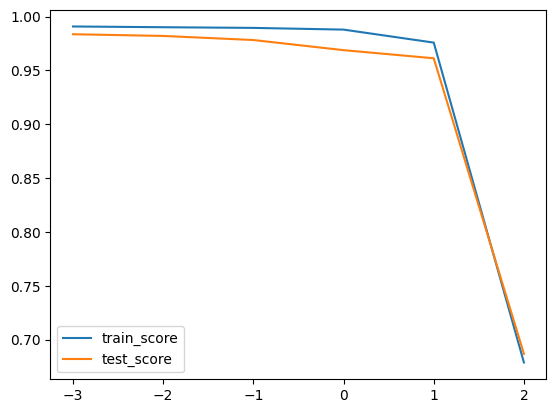

In [98]:
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.legend()
plt.show()

In [106]:
# 엘라스틱넷은 -2에서 가장 좋은 모델을 갖는것 같네요! -3은 과적합인 것 같네요.
en = ElasticNet(alpha=0.01)
en.fit(train_scaled, train_target)
print('최적의 엘라스틱넷 훈련 점수는 : {}'.format(en.score(train_scaled, train_target)))
print('최적의 엘라스틱넷 테스트 점수는 : {}'.format(en.score(test_scaled, test_target)))

최적의 엘라스틱넷 훈련 점수는 : 0.9900733827716427
최적의 엘라스틱넷 테스트 점수는 : 0.9819745581466657
